<a href="https://colab.research.google.com/github/AuliaInsanii/FromColab/blob/main/Pertemuan4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/calonpembeli_ch5.csv')
df1.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


var.output: beli_mobil

sisanya adalah feature

In [ ]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


karena ada usia max 164 thn, karena tdk masuk akal/logis maka itu termasuk noise.

berikut hapus noise:

In [ ]:
df1 = df1[df1['Usia']<=100]
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,501.073146,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269
std,288.823862,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,252.250000,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000
50%,501.500000,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000
75%,750.750000,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000
max,1000.000000,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [ ]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

karena tdk ada null jadi tdk usah dibersihkan.

tapi berikut untuk membuang null, jika ada:

In [ ]:
df1.dropna()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
df1['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

untuk kasus nyata, sebaiknya kita harus membuat datasetnya seimbang. Kita bisa menggunakan undersampling dan oversampling.

In [ ]:
import sklearn.model_selection as ms
X = df1[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df1.Beli_Mobil
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import sklearn.linear_model as lm
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

berikut nilai b untuk output

In [ ]:
print(model.coef_)

[[-0.0159435  -0.17093131 -1.03941699  0.07720535  0.05686692]]


In [ ]:
y_prediksi=model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


272 memiliki peluang beli mobil karena 1(liat hasil print y_prediksi).

727 memiliki tidak memiliki peluang beli mobil karena 0(liat hasil print y_prediksi).

dst.

In [ ]:
X_test

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348
...,...,...,...,...,...
937,44,3,0,1,330
624,48,0,0,2,145
257,28,1,1,1,391
274,26,2,0,1,177


Berikut mengukur kinerja mobil:

In [ ]:
import sklearn.metrics as met
confussionmatrix = met.confusion_matrix(y_test, y_prediksi)
confussionmatrix

array([[ 59,   4],
       [  5, 132]])

accuracy = (true positif + true negatif)/(TP+TN+FP+FN)

nilai score model diatas 70% sudah dikatakan bagus.

In [ ]:
score = model.score(X_test, y_test)
score

0.955

precision: memberi pertunjuk seberapa baik model menerima 

precision = (TP)/(TP+FP)

In [ ]:
precision = met.precision_score(y_test, y_prediksi)
precision

0.9705882352941176

recall (sensitifitas) = (TP)/(TP+FN)

In [ ]:
recall = met.recall_score(y_test, y_prediksi)
recall

0.9635036496350365

Berikut kurva roc:

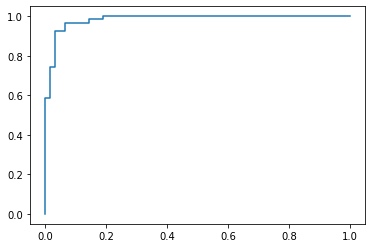

In [ ]:
import matplotlib.pyplot as plt
y_pred_prob = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_prob)
plt.plot(fp, tp)
plt.show()

garis yang menghubungkan FP dan TP. 

AUC (Area Under Curve):

In [ ]:
auc = met.roc_auc_score(y_test, y_prediksi)
auc

0.9500057930714866

Feature selection RFE: untuk memilih feature yang baik untuk model.

In [ ]:
import sklearn.feature_selection as fs
rfe = fs.RFE(model, 3)
rfe = rfe.fit(X_train, y_train)
print(rfe.support)
print(rfe.ranking)